## What is CO-CONNECT Tools?

`co-connect-tools` is a software package. The main component is the `coconnect` module that contains python classes and tools for:

* Common Data Model
* Health Data Elements (person, condition_occurence...)
* I/O 
* Command Line Interface
* Various Tools

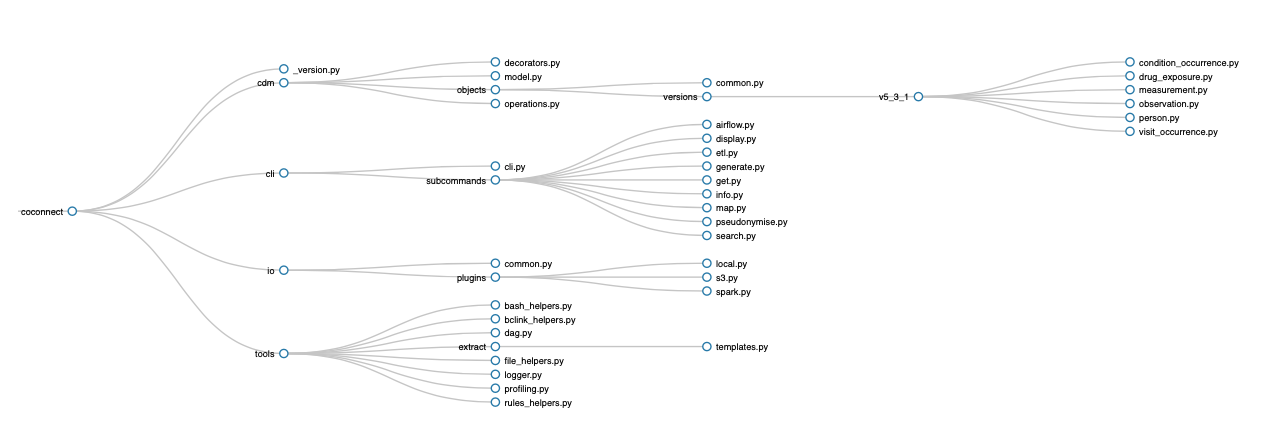


## What are the Health Data Elements ?

Classes for controlling and handling the building of elements such as the `person` table. 


In [1]:
from coconnect.cdm.objects import Person
Person

coconnect.cdm.objects.versions.v5_3_1.person.Person

In [2]:
person = Person()
person.get_field_names()

['person_id',
 'gender_concept_id',
 'year_of_birth',
 'month_of_birth',
 'day_of_birth',
 'birth_datetime',
 'race_concept_id',
 'ethnicity_concept_id',
 'location_id',
 'provider_id',
 'care_site_id',
 'person_source_value',
 'gender_source_value',
 'gender_source_concept_id',
 'race_source_value',
 'race_source_concept_id',
 'ethnicity_source_value',
 'ethnicity_source_concept_id']

In [3]:
person.get_field_dtypes()

{'person_id': 'Integer',
 'gender_concept_id': 'Integer',
 'year_of_birth': 'Integer',
 'month_of_birth': 'Integer',
 'day_of_birth': 'Integer',
 'birth_datetime': 'Timestamp',
 'race_concept_id': 'Integer',
 'ethnicity_concept_id': 'Integer',
 'location_id': 'Integer',
 'provider_id': 'Integer',
 'care_site_id': 'Integer',
 'person_source_value': 'Text50',
 'gender_source_value': 'Text50',
 'gender_source_concept_id': 'Integer',
 'race_source_value': 'Text50',
 'race_source_concept_id': 'Integer',
 'ethnicity_source_value': 'Text50',
 'ethnicity_source_concept_id': 'Integer'}

In [4]:
import pandas as pd
import numpy as np
def build_person(self):
    n = 10
    self.person_id.series = pd.Series((i for i in range (n)))
    self.gender_concept_id.series = pd.Series(np.random.choice([8507,8532],size=n))
    self.birth_datetime.series = pd.Series(np.random.choice(['1970-01-01','1990-01-01'],size=n))

person.define = build_person

In [5]:
person.get_df(force_rebuild=True)

2022-03-17 12:37:19 - Person - INFO - Automatically formatting data columns.
2022-03-17 12:37:19 - Person - INFO - created df (0x1143fe9a0)[0x1108c2f70]


,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id
0,0,8532,1990,1,1,1990-01-01 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,8507,1970,1,1,1970-01-01 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,8507,1990,1,1,1990-01-01 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8532,1970,1,1,1970-01-01 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,8532,1970,1,1,1970-01-01 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,8507,1990,1,1,1990-01-01 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,8507,1990,1,1,1990-01-01 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,8507,1990,1,1,1990-01-01 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,8507,1990,1,1,1990-01-01 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,8507,1990,1,1,1990-01-01 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What do you mean by I/O ?

Various helper classes for data collections that control the Input/Output

In [6]:
from coconnect.io import LocalDataCollection, SqlDataCollection, BCLinkDataCollection
LocalDataCollection, SqlDataCollection, BCLinkDataCollection

(coconnect.io.plugins.local.LocalDataCollection,
 coconnect.io.plugins.sql.SqlDataCollection,
 coconnect.io.plugins.bclink.BCLinkDataCollection)

A `LocalDataCollection` can be used to load local csv files

In [7]:
local = LocalDataCollection({'Demographics.csv':'../data/part1/Demographics.csv'},nrows=10,chunksize=5)
local

2022-03-17 12:37:19 - LocalDataCollection - INFO - DataCollection Object Created
2022-03-17 12:37:19 - LocalDataCollection - INFO - Using a chunksize of '5' nrows
2022-03-17 12:37:19 - LocalDataCollection - INFO - Registering  Demographics.csv [<coconnect.io.common.DataBrick object at 0x1108c2d00>]


In [8]:
local['Demographics.csv']

2022-03-17 12:37:19 - LocalDataCollection - INFO - Retrieving initial dataframe for 'Demographics.csv' for the first time


,ID,Age,Sex,Ethnicity,IMD
0,pk1,73,Male,Black,5
1,pk2,65,Female,Black,5
2,pk3,29,Male,White,4
3,pk4,91,Male,White,3
4,pk5,56,Male,White,6


In [9]:
local.next()

2022-03-17 12:37:19 - LocalDataCollection - INFO - Getting next chunk of data
2022-03-17 12:37:19 - LocalDataCollection - INFO - Getting the next chunk of size '5' for 'Demographics.csv'
2022-03-17 12:37:19 - LocalDataCollection - INFO - --> Got 5 rows


In [10]:
local['Demographics.csv']

,ID,Age,Sex,Ethnicity,IMD
5,pk6,71,Female,White,6
6,pk7,109,Male,White,7
7,pk8,54,Female,NaN,6
8,pk9,60,Female,NaN,4
9,pk10,69,Male,White,7


In [11]:
local.reset()

2022-03-17 12:37:19 - LocalDataCollection - INFO - resetting used bricks


A `BCLinkDataCollection` is used to interact with BCLink (for either I/O)

In [12]:
bclink = BCLinkDataCollection({'dry_run':True,'tables':{'person':'ds1000','observation':'ds10002'}},
                              output_folder='cache')

2022-03-17 12:37:19 - BCLinkDataCollection - INFO - setup bclink collection
2022-03-17 12:37:19 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT EXISTS (SELECT 1 FROM information_schema.tables WHERE table_name = 'ds1000' ) bclink
2022-03-17 12:37:19 - BCLinkHelpers - INFO - ds1000 (person) already exists --> all good
2022-03-17 12:37:19 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT EXISTS (SELECT 1 FROM information_schema.tables WHERE table_name = 'ds10002' ) bclink
2022-03-17 12:37:19 - BCLinkHelpers - INFO - ds10002 (observation) already exists --> all good
2022-03-17 12:37:19 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT count(*) FROM ds1000 bclink
2022-03-17 12:37:19 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT count(*) FROM ds10002 bclink
2022-03-17 12:37:19 - BCLinkDataCollection - INFO - DataCollection Object Created


In [13]:
bclink.bclink_helpers.get_table_map()

{'person': 'ds1000', 'observation': 'ds10002'}

In [14]:
bclink.bclink_helpers.check_table_exists('person')

2022-03-17 12:37:19 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT EXISTS (SELECT 1 FROM information_schema.tables WHERE table_name = 'person' ) bclink


True

Example, create an indexing map by retrieving the last index of the table currently in BCLink:

In [15]:
bclink.load_indexing()

2022-03-17 12:37:19 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT count(*) FROM ds1000 bclink
2022-03-17 12:37:19 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT column_name FROM INFORMATION_SCHEMA. COLUMNS WHERE table_name = 'ds1000' LIMIT 1  bclink
2022-03-17 12:37:19 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT person_id FROM ds1000 ORDER BY -person_id LIMIT 1;  bclink
2022-03-17 12:37:19 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT count(*) FROM ds10002 bclink
2022-03-17 12:37:19 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT column_name FROM INFORMATION_SCHEMA. COLUMNS WHERE table_name = 'ds10002' LIMIT 1  bclink
2022-03-17 12:37:19 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT person_id FROM ds10002 ORDER BY -person_id LIMIT 1;  bclink


{}

## What are the tools?

Lots of different features, mostly helper functions used throughout the code

For example, loading a json rules file:

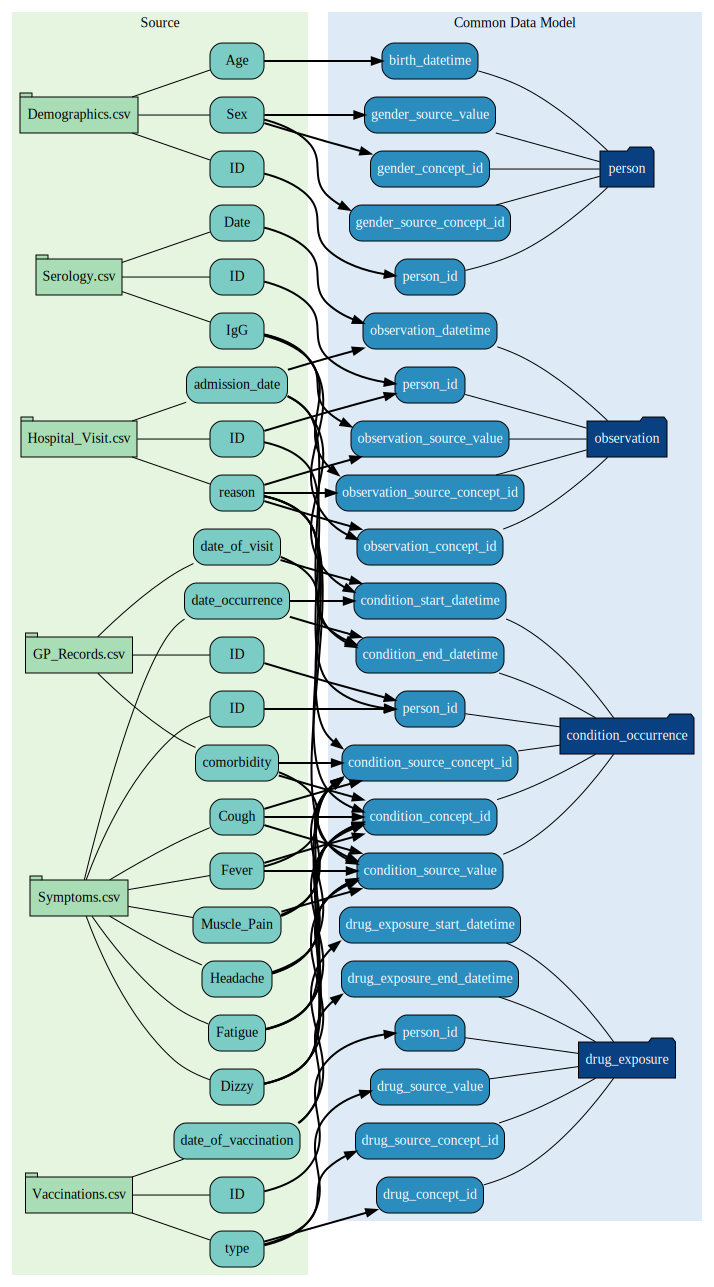

In [16]:
from IPython.display import SVG, display
from coconnect.tools import load_json,make_dag

rules = load_json('../data/rules.json')

def show_svg():
    return display(SVG(make_dag(rules['cdm'])))
show_svg()

In [17]:
from coconnect.tools import remove_missing_sources_from_rules
filtered_rules = remove_missing_sources_from_rules(rules,local.keys())
filtered_rules

2022-03-17 12:37:20 - remove_missing_sources_from_rules - WARNING - removed Antibody 3027 from rules because it was not loaded
2022-03-17 12:37:20 - remove_missing_sources_from_rules - WARNING - removed H/O: heart failure 3043 from rules because it was not loaded
2022-03-17 12:37:20 - remove_missing_sources_from_rules - WARNING - removed 2019-nCoV 3044 from rules because it was not loaded
2022-03-17 12:37:20 - remove_missing_sources_from_rules - WARNING - removed Cancer 3045 from rules because it was not loaded
2022-03-17 12:37:20 - remove_missing_sources_from_rules - WARNING - removed cdm table 'observation' from rules
2022-03-17 12:37:20 - remove_missing_sources_from_rules - WARNING - removed Headache 3028 from rules because it was not loaded
2022-03-17 12:37:20 - remove_missing_sources_from_rules - WARNING - removed Fatigue 3029 from rules because it was not loaded
2022-03-17 12:37:20 - remove_missing_sources_from_rules - WARNING - removed Dizziness 3030 from rules because it was no

{'metadata': {'date_created': '2022-02-11T12:22:48.465257',
  'dataset': 'FAILED: ExampleV4'},
 'cdm': {'person': {'MALE 3025': {'birth_datetime': {'source_table': 'Demographics.csv',
     'source_field': 'Age',
     'operations': ['get_datetime_from_age']},
    'gender_concept_id': {'source_table': 'Demographics.csv',
     'source_field': 'Sex',
     'term_mapping': {'Male': 8507}},
    'gender_source_concept_id': {'source_table': 'Demographics.csv',
     'source_field': 'Sex',
     'term_mapping': {'Male': 8507}},
    'gender_source_value': {'source_table': 'Demographics.csv',
     'source_field': 'Sex'},
    'person_id': {'source_table': 'Demographics.csv', 'source_field': 'ID'}},
   'FEMALE 3026': {'birth_datetime': {'source_table': 'Demographics.csv',
     'source_field': 'Age',
     'operations': ['get_datetime_from_age']},
    'gender_concept_id': {'source_table': 'Demographics.csv',
     'source_field': 'Sex',
     'term_mapping': {'Female': 8532}},
    'gender_source_concept_i

## What is the `CommonDataModel` ?

The python class that controls everything when building a common data model


In [18]:
from coconnect.cdm import CommonDataModel
CommonDataModel

coconnect.cdm.model.CommonDataModel

In [19]:
cdm = CommonDataModel.from_rules(filtered_rules,inputs=local,outputs=bclink)

2022-03-17 12:37:20 - CommonDataModel - INFO - CommonDataModel (5.3.1) created with co-connect-tools version 0.0.0
2022-03-17 12:37:20 - CommonDataModel - INFO - Running with an DataCollection object
2022-03-17 12:37:20 - CommonDataModel - INFO - Turning on automatic cdm column filling
2022-03-17 12:37:20 - BCLinkHelpers - WARNING - No table for getting existing person ids (person_ids) has been defined
2022-03-17 12:37:20 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT count(*) FROM ds1000 bclink
2022-03-17 12:37:20 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT column_name FROM INFORMATION_SCHEMA. COLUMNS WHERE table_name = 'ds1000' LIMIT 1  bclink
2022-03-17 12:37:20 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT person_id FROM ds1000 ORDER BY -person_id LIMIT 1;  bclink
2022-03-17 12:37:20 - BCLinkHelpers - NOTICE - bc_sqlselect --user=bclink --query=SELECT count(*) FROM ds10002 bclink
2022-03-17 12:37:20 - BCLinkHelpe

In [20]:
cdm.process()

2022-03-17 12:37:20 - CommonDataModel - INFO - Starting processing in order: ['person']
2022-03-17 12:37:20 - CommonDataModel - INFO - Number of objects to process for each table...
{
      "person": 2
}
2022-03-17 12:37:20 - CommonDataModel - INFO - for person: found 2 objects
2022-03-17 12:37:20 - CommonDataModel - INFO - working on person
2022-03-17 12:37:20 - CommonDataModel - INFO - starting on MALE 3025
2022-03-17 12:37:20 - Person - INFO - Called apply_rules
2022-03-17 12:37:20 - LocalDataCollection - INFO - Retrieving initial dataframe for 'Demographics.csv' for the first time
2022-03-17 12:37:20 - Person - INFO - Mapped birth_datetime
2022-03-17 12:37:20 - Person - INFO - Mapped gender_concept_id
2022-03-17 12:37:20 - Person - INFO - Mapped gender_source_concept_id
2022-03-17 12:37:20 - Person - INFO - Mapped gender_source_value
2022-03-17 12:37:20 - Person - INFO - Mapped person_id
2022-03-17 12:37:20 - Person - WARNING - Requiring non-null values in gender_concept_id removed

In [21]:
cdm['person'].dropna(axis=1)

,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,gender_source_value,gender_source_concept_id
person_id,,,,,,,
6,8507,1947,7,20,1947-07-20 00:00:00.000000,Male,8507
7,8507,1991,7,9,1991-07-09 00:00:00.000000,Male,8507
8,8507,1929,7,24,1929-07-24 00:00:00.000000,Male,8507
9,8507,1964,7,15,1964-07-15 00:00:00.000000,Male,8507
10,8532,1955,7,18,1955-07-18 00:00:00.000000,Female,8532
